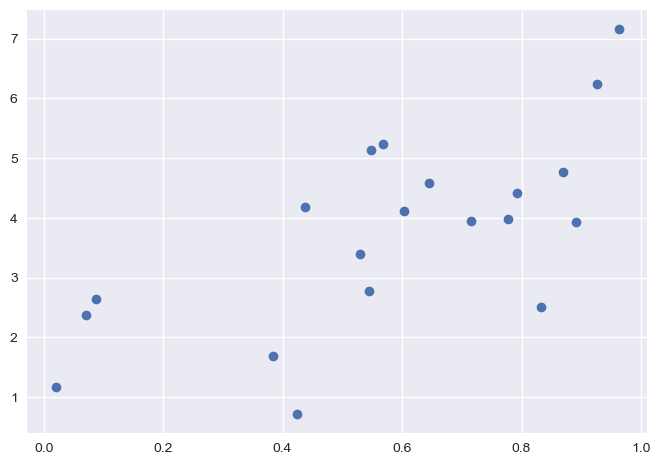

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

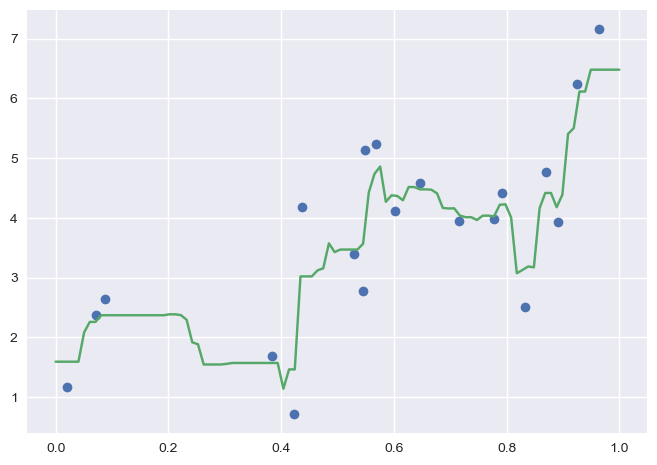

In [22]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(random_state=42)
model1.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit)

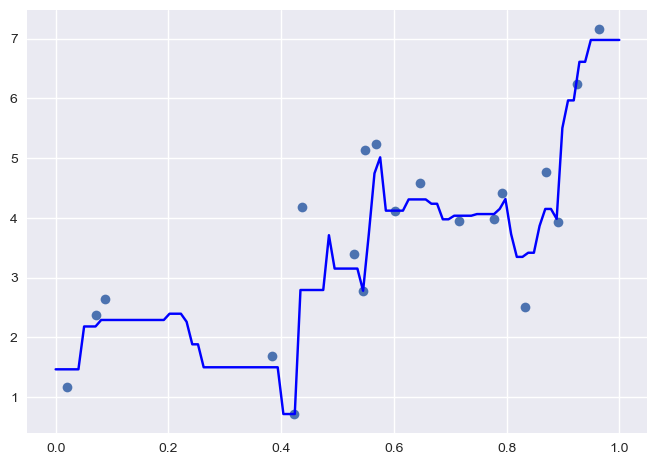

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

pa = {"n_estimators":[5,50,100],"max_depth":[8,9,10]}
gr = GridSearchCV(RandomForestRegressor(),pa,cv = 3)
gr.fit(X, y)

X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = gr.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit,color = "blue")

-43.05374633360803 16 170


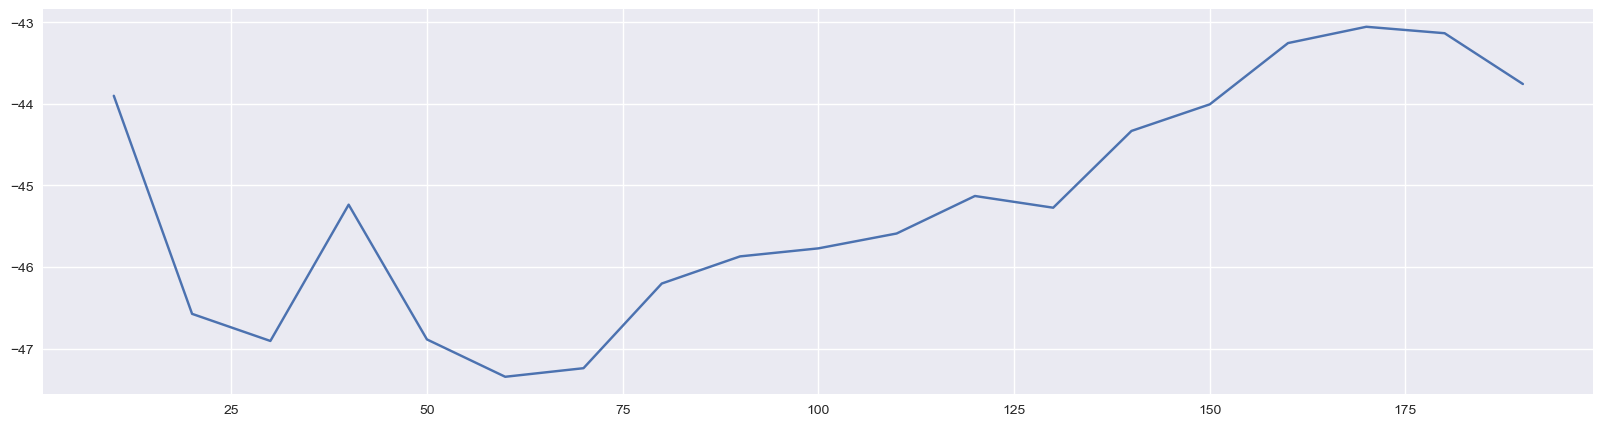

In [40]:
from sklearn.model_selection import cross_val_score
lists = []
for i in range(10,200,10):
    re = RandomForestRegressor(n_estimators=i,random_state=42)
    re_s = cross_val_score(re,X,y,cv=10).mean()# 评估指标
    lists.append(re_s)
print(max(lists),lists.index(max(lists)),(lists.index(max(lists)))*10+10)#输出最大值及其索引
 
plt.figure(figsize=[20,5])
plt.plot(range(10,200,10),lists)#横纵坐标
plt.show()

-43.05374633360803 0 10


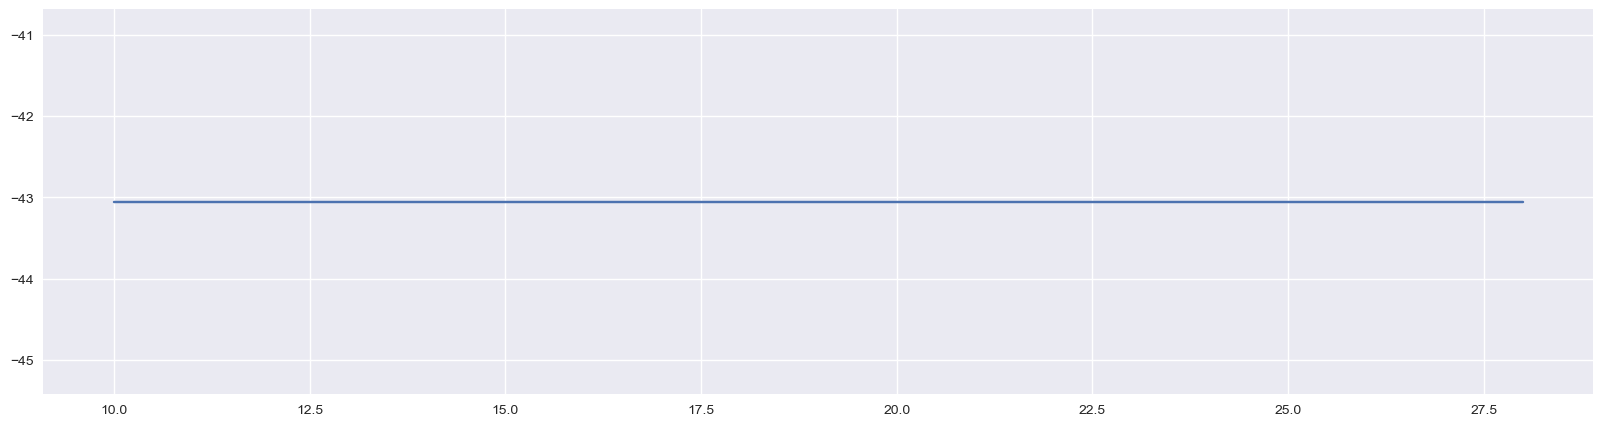

In [43]:
# max_depth的学习曲线
lists = []
for i in range(10,30,2):
    re = RandomForestRegressor(n_estimators=170,max_depth=i,random_state=42)
    re_s = cross_val_score(re,X,y,cv=10 ).mean()# 评估指标
    lists.append(re_s)
print(max(lists),lists.index(max(lists)),(lists.index(max(lists)))*2+10)#输出最大值及其索引
 
plt.figure(figsize=[20,5])
plt.plot(range(10,30,2),lists)#横纵坐标
 
plt.show()

-11.514772395925197 5 6


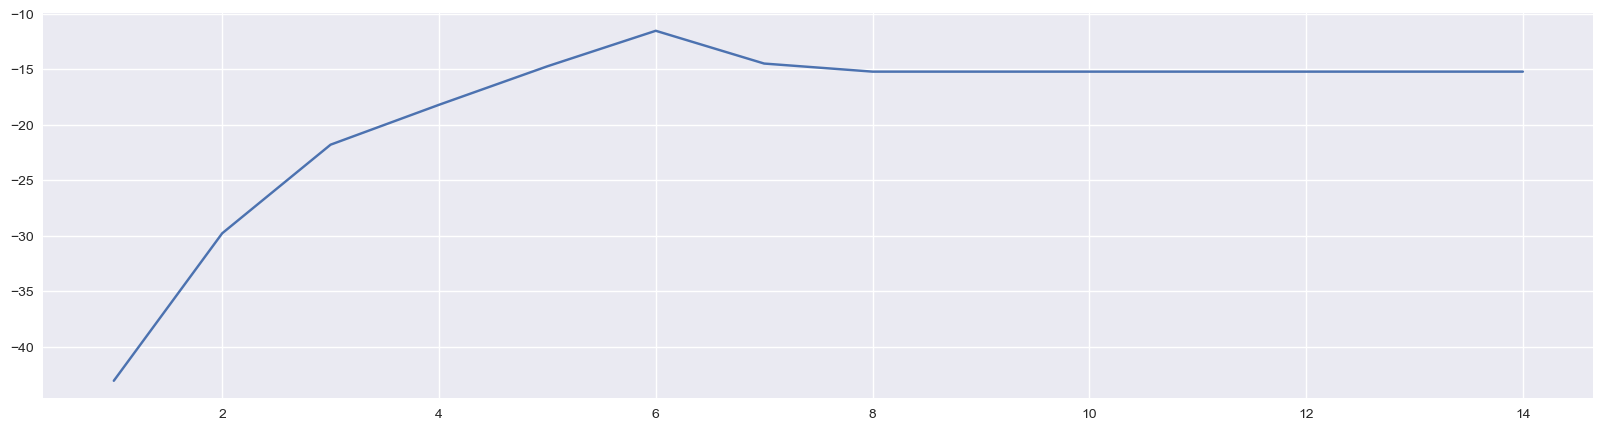

In [44]:
# min_samples_leaf的学习曲线
lists = []
for i in range(1,15,1):
    re = RandomForestRegressor(n_estimators=170,max_depth=10,min_samples_split=2,min_samples_leaf=i,random_state=42)
    re_s = cross_val_score(re,X,y,cv=10).mean()# 评估指标
    lists.append(re_s)
print(max(lists),lists.index(max(lists)),(lists.index(max(lists)))*1+1)#输出最大值及其索引
 
plt.figure(figsize=[20,5])
plt.plot(range(1,15,1),lists)#横纵坐标
plt.show()

In [45]:
# max_features的学习曲线，每棵树用到的最大特征数
#from sklearn.model_selection import GridSearchCV
 
pa = {'max_features':np.arange(0, 10, 1)} 
 
re = RandomForestRegressor(n_estimators=170,max_depth=10,min_samples_split=2,min_samples_leaf=6,random_state=42)
GS = GridSearchCV(re,pa,cv=10)
GS.fit(X, y)
 
print(GS.best_params_)

{'max_features': 1}


D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "D:\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self

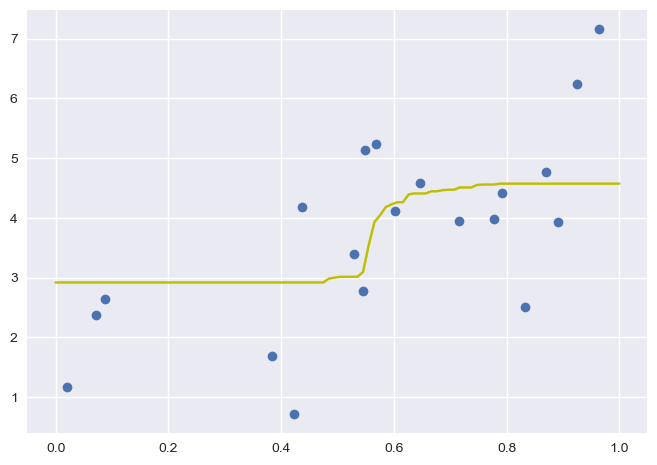

In [46]:
#最优模型
model = RandomForestRegressor(n_estimators=170,max_depth=10,min_samples_split=2,min_samples_leaf=6,random_state=42)
model.fit(X, y)

X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit,color = "y")

PCA实例

In [53]:
from sklearn.decomposition import PCA
data1 = np.array([[-1, 0], [-2, -1], [-3, -3], [0, 1], [1, 1], [2, 3]])
pca = PCA(n_components=1)
ndata = pca.fit_transform(data1)     
data2 = pca.inverse_transform(ndata)  

In [54]:
print(data1)

[[-1  0]
 [-2 -1]
 [-3 -3]
 [ 0  1]
 [ 1  1]
 [ 2  3]]


In [55]:
print(ndata)

[[ 0.46034385]
 [ 1.8731306 ]
 [ 4.02406596]
 [-0.95244291]
 [-1.62708107]
 [-3.77801643]]


In [56]:
print(data2)

[[-0.81056553 -0.1731355 ]
 [-1.76368539 -1.21598206]
 [-3.21478846 -2.80369198]
 [ 0.14255433  0.86971107]
 [ 0.59769098  1.36769428]
 [ 2.04879405  2.9554042 ]]


In [57]:
print(pca.explained_variance_ratio_)

[0.98456322]
